In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, zero_one_loss
import sklearn.neural_network as nn
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
data = mnist.data
target = mnist.target
#division de la base en données d'apprentissage (49000) et de test
datatrain, datatest, targettrain, targettest = train_test_split(data, target,train_size=0.70)
print(datatrain.shape)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(49000, 784)


In [5]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(50))
mlp.fit(datatrain,targettrain)
mlp.score(datatest,targettest)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9488571428571428

In [8]:
print(targettest[3])
print(mlp.predict(datatest)[3])

1
1


In [10]:
precision_score(targettest,mlp.predict(datatest),average='micro')

0.9434761904761905

In [12]:
precisions_couches = []
temps_couches = []
rappel_couches = []
erreur_couches = []
for nb_c in [2,10,20,50,70,100]:
    hls = tuple(50 for i in range(nb_c))
    mlp = nn.MLPClassifier(hidden_layer_sizes=hls)
    start_time = time.time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.time()-start_time
    prec = mlp.score(datatest,targettest)
    precisions_couches.append(prec)
    temps_couches.append(elapsed)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    rappel_couches.append(rap)
    erreur_couches.append(err)
    prec_train = mlp.score(datatrain,targettrain)
    print("precision =", prec, "temps =", elapsed,"sur train =",prec_train, "pour", nb_c,"couches")

precision = 0.9601428571428572 pour 2 couches
precision = 0.9674761904761905 pour 10 couches
precision = 0.967 pour 20 couches
precision = 0.8991904761904762 pour 50 couches
precision = 0.10976190476190475 pour 100 couches


In [1]:
precisions_neurones = []
temps_neurones = []
rappel_neurones = []
erreur_neurones = []
for nb_n in [5,10,20,30,40,50,60,70,80,90,100,150,200,300]:
    hls = tuple(nb_n for i in range(10))
    mlp = nn.MLPClassifier(hidden_layer_sizes=hls)
    start_time = time.time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.time()-start_time
    prec = mlp.score(datatest,targettest)
    precisions_neurones.append(prec)
    temps_neurones.append(elapsed)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    rappel_neurones.append(rap)
    erreur_neurones.append(err)
    prec_train = mlp.score(datatrain,targettrain)
    print("precision =", prec, "temps =", elapsed,"sur train =",prec_train, "pour", nb_n,"neurones")

NameError: name 'nn' is not defined

In [38]:
tpl4 = tuple(i for i in range(10,60,5))
mlp = nn.MLPClassifier(hidden_layer_sizes=hls)
start_time = time.time()
mlp.fit(datatrain,targettrain)
elapsed = time.time() - start_time
prec = mlp.score(datatest,targettest)
print("10 couches: precision =",prec,"temps =",elapsed)
prec_train = mlp.score(datatrain,targettrain)
print(prec_train)

10 couches: precision = 0.10976190476190475 temps = 281.03453159332275
0.11371428571428571


In [23]:
tpl1 = tuple(60-i for i in range(50))
mlp = nn.MLPClassifier(hidden_layer_sizes=hls)
start_time = time.time()
mlp.fit(datatrain,targettrain)
elapsed = time.time() - start_time
prec = mlp.score(datatest,targettest)
print("50 couches: precision =",prec,"temps =",elapsed)
prec_train = mlp.score(datatrain,targettrain)
print(prec_train)

50 couches: precision = 0.10976190476190475 temps = 226.70809483528137


In [24]:
pas = int(-49/20)
tpl2 = tuple(i for i in range(60,10,pas))
mlp = nn.MLPClassifier(hidden_layer_sizes=hls)
start_time = time.time()
mlp.fit(datatrain,targettrain)
elapsed = time.time() - start_time
prec = mlp.score(datatest,targettest)
print("20 couches: precision =",prec,"temps =",elapsed)
prec_train = mlp.score(datatrain,targettrain)
print(prec_train)

20 couches: precision = 0.10976190476190475 temps = 177.14149069786072


In [34]:
tpl3 = tuple(i for i in range(60,13,3))
mlp = nn.MLPClassifier(hidden_layer_sizes=hls)
start_time = time.time()
mlp.fit(datatrain,targettrain)
elapsed = time.time() - start_time
prec = mlp.score(datatest,targettest)
print("20 couches: precision =",prec,"temps =",elapsed)
prec_train = mlp.score(datatrain,targettrain)
print(prec_train)

20 couches: precision = 0.10976190476190475 temps = 221.64930701255798
0.11371428571428571


In [31]:
nb_couches = 10
archi = tuple(50 for i in range(nb_couches))

In [32]:
precisions_algos = []
rappel_algos = []
temps_algos = []
erreur_algos = []
for s in ["lbfgs","sgd","adam"]:
    mlp = nn.MLPClassifier(hidden_layer_sizes=archi,solver=s)
    start_time = time.time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.time()-start_time
    testpred = mlp.predict(datatest)
    prec = mlp.score(datatest,targettest)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    precisions_algos.append(prec)
    rappel_algos.append(rap)
    temps_algos.append(elapsed)
    erreur_algos.append(err)
    print("precision =", prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"pour",s)

precision = 0.9422380952380952 rappel = 0.9422380952380952 erreur = 0.05776190476190479 temps = 228.75178408622742 pour lbfgs
precision = 0.9628571428571429 rappel = 0.9628571428571429 erreur = 0.037142857142857144 temps = 176.46123909950256 pour sgd
precision = 0.9699523809523809 rappel = 0.9699523809523809 erreur = 0.0300476190476191 temps = 155.81297302246094 pour adam


In [33]:
precisions_activ = []
rappel_activ = []
temps_activ = []
erreur_activ = []
for a in ["identity", "logistic", "tanh", "relu"]:
    mlp = nn.MLPClassifier(hidden_layer_sizes=archi,activation=a)
    start_time = time.time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.time()-start_time
    testpred = mlp.predict(datatest)
    prec = mlp.score(datatest,targettest)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    precisions_activ.append(prec)
    rappel_activ.append(rap)
    temps_activ.append(elapsed)
    erreur_activ.append(err)
    print("precision =", prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"pour",a)

precision = 0.9094761904761904 rappel = 0.9094761904761904 erreur = 0.09052380952380956 temps = 244.09543204307556 pour identity
precision = 0.10976190476190475 rappel = 0.10976190476190475 erreur = 0.8902380952380953 temps = 64.16234230995178 pour logistic
precision = 0.9204285714285714 rappel = 0.9204285714285714 erreur = 0.07957142857142863 temps = 67.05857253074646 pour tanh
precision = 0.9693333333333334 rappel = 0.9693333333333334 erreur = 0.03066666666666662 temps = 125.73065257072449 pour relu


In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('size')
ax1.set_ylabel('score', color=color)
ax1.plot(["identity", "logistic", "tanh", "relu"],scores_pourc,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot(np.arange(2000,57001,5000),time_s,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [35]:
precisions_regul = []
rappel_regul = []
temps_regul = []
erreur_regul = []
for a in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    mlp = nn.MLPClassifier(hidden_layer_sizes=archi,alpha=a)
    start_time = time.time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.time()-start_time
    testpred = mlp.predict(datatest)
    prec = mlp.score(datatest,targettest)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    precisions_regul.append(prec)
    rappel_regul.append(rap)
    temps_regul.append(elapsed)
    erreur_regul.append(err)
    print("precision =", prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"pour",a)

precision = 0.9691904761904762 rappel = 0.9691904761904762 erreur = 0.030809523809523842 temps = 141.5098752975464 pour 0.1
precision = 0.9686666666666667 rappel = 0.9686666666666667 erreur = 0.031333333333333324 temps = 196.37343740463257 pour 0.01
precision = 0.9688571428571429 rappel = 0.9688571428571429 erreur = 0.03114285714285714 temps = 112.71634268760681 pour 0.001
precision = 0.9711904761904762 rappel = 0.9711904761904762 erreur = 0.02880952380952384 temps = 171.95429587364197 pour 0.0001
precision = 0.9714285714285714 rappel = 0.9714285714285714 erreur = 0.02857142857142858 temps = 143.44412970542908 pour 1e-05
precision = 0.9693809523809523 rappel = 0.9693809523809523 erreur = 0.030619047619047657 temps = 157.66384482383728 pour 1e-06
precision = 0.9685714285714285 rappel = 0.9685714285714285 erreur = 0.03142857142857147 temps = 160.22101187705994 pour 1e-07
precision = 0.9711904761904762 rappel = 0.9711904761904762 erreur = 0.02880952380952384 temps = 133.51481080055237 pou

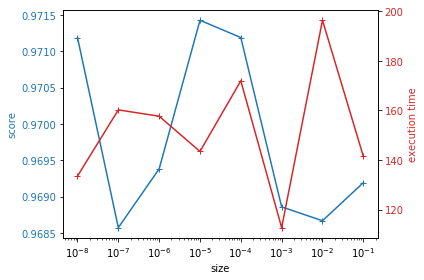

In [37]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('size')
ax1.set_xscale("log")
ax1.set_ylabel('score', color=color)
ax1.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],precisions_regul,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],temps_regul,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()